Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting. If you want to learn Time Series Forecasting with ARIMA, this article is for you. In this article, I will take you through the task of Time Series Forecasting with ARIMA using the Python programming language.



## What is ARIMA?

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

1. p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
2. d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
3. q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

I hope you have now understood the ARIMA model. In the section below, I will take you through the task of Time Series Forecasting of stock prices with ARIMA using the Python programming language.

## Time Series Forecasting with ARIMA

Now let’s start with the task of Time Series Forecasting with ARIMA. I will first collect Google stock price data using the Yahoo Finance API. If you have never used Yahoo Finance API, you can learn more about it here.

Now here’s how to collect data about the Google’s Stock Price:

In [3]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-08-16  129.279999  130.897995  128.460007  129.110001  129.110001   
247 2023-08-17  130.449997  132.490997  129.850006  130.460007  130.460007   
248 2023-08-18  129.059998  129.830002  127.000000  128.110001  128.110001   
249 2023-08-21  127.849998  129.259995  127.160004  128.929993  128.929993   
250 2023-08-22  129.130005  130.949997  128.925003  129.690002  129.690002   

       Volume  
246  17548400  
247  23665600  
248  23619400  
249  21851100  
250  15557900  


In [36]:
df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

NameError: name 'df' is not defined

In [34]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [35]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)

NameError: name 'cormap' is not defined

In [33]:

df = df[top_corelated_values.index]


NameError: name 'df' is not defined

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

NameError: name 'X' is not defined

We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [2]:
pip install yfinance

  Using cached yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ---------------------------------------- 3.8/3.8 MB 1.1 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ---------------------------------------- 96.6/96.6 kB 1.1 MB/s eta 0:00:00
  Using cached urllib3-2.0.4-py3-none-any.whl (123 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-08-23  114.769997
1 2022-08-24  114.699997
2 2022-08-25  117.699997
3 2022-08-26  111.300003
4 2022-08-29  110.339996


Now let’s visualize the close prices of Google before moving forward:

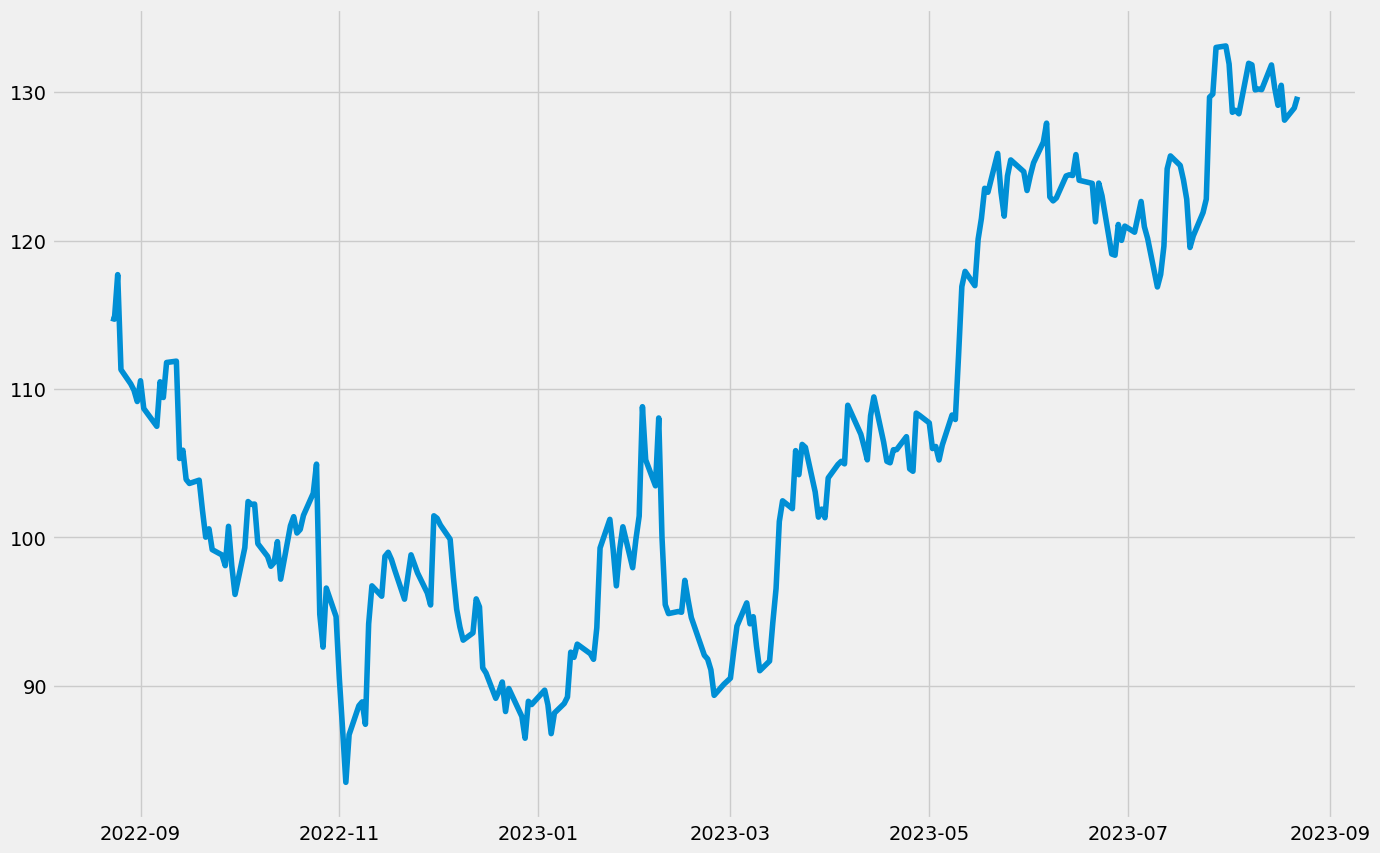

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

## Using ARIMA for Time Series Forecasting

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', p = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

TypeError: seasonal_decompose() got an unexpected keyword argument 'p'

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

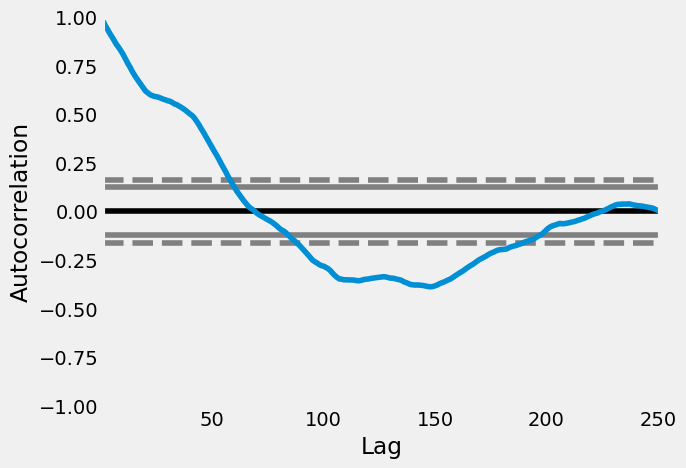

In [7]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

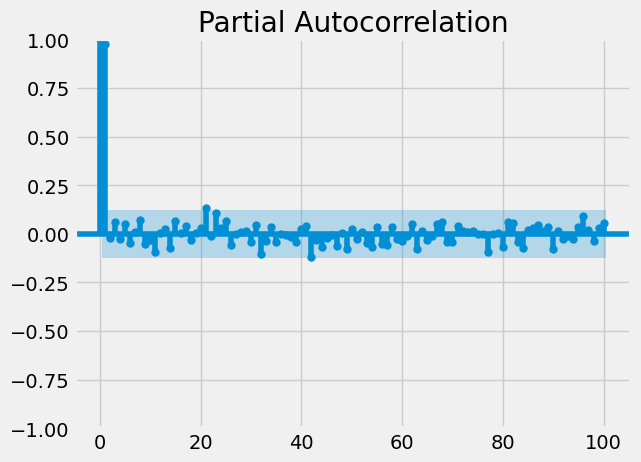

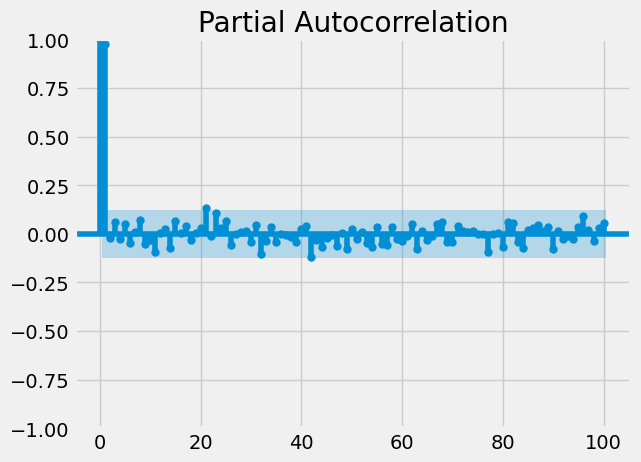

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [9]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
# Fit the model
fitted = model.fit()
# Set the display option
fitted.params['disp'] = -1
# Print the summary
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -559.670
Date:                Wed, 23 Aug 2023   AIC                           1135.340
Time:                        16:21:27   BIC                           1163.512
Sample:                             0   HQIC                          1146.679
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0230      0.371     -0.062      0.950      -0.749       0.703
ar.L2          0.7640      0.355      2.154      0.031       0.069       1.459
ar.L3         -0.0054      0.092     -0.059      0.9

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Here’s how to predict the values using the ARIMA model:

In [10]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      114.770015
2      114.697860
3      117.806563
4      110.722658
          ...    
246    129.824083
247    129.392483
248    130.386112
249    127.925261
250    129.215031
Name: predicted_mean, Length: 251, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [11]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.072
Date:                            Wed, 23 Aug 2023   AIC                           1126.145
Time:                                    16:21:50   BIC                           1178.229
Sample:                                         0   HQIC                          1147.136
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3422      2.921      0.117      0.907      -5.383       6.067
ar.L2          0.0474      0.614   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:



In [12]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    131.133083
252    133.045141
253    132.189741
254    131.962951
255    130.651555
256    131.421200
257    131.166703
258    130.512840
259    131.401347
260    131.717402
261    131.493486
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:



<Axes: >

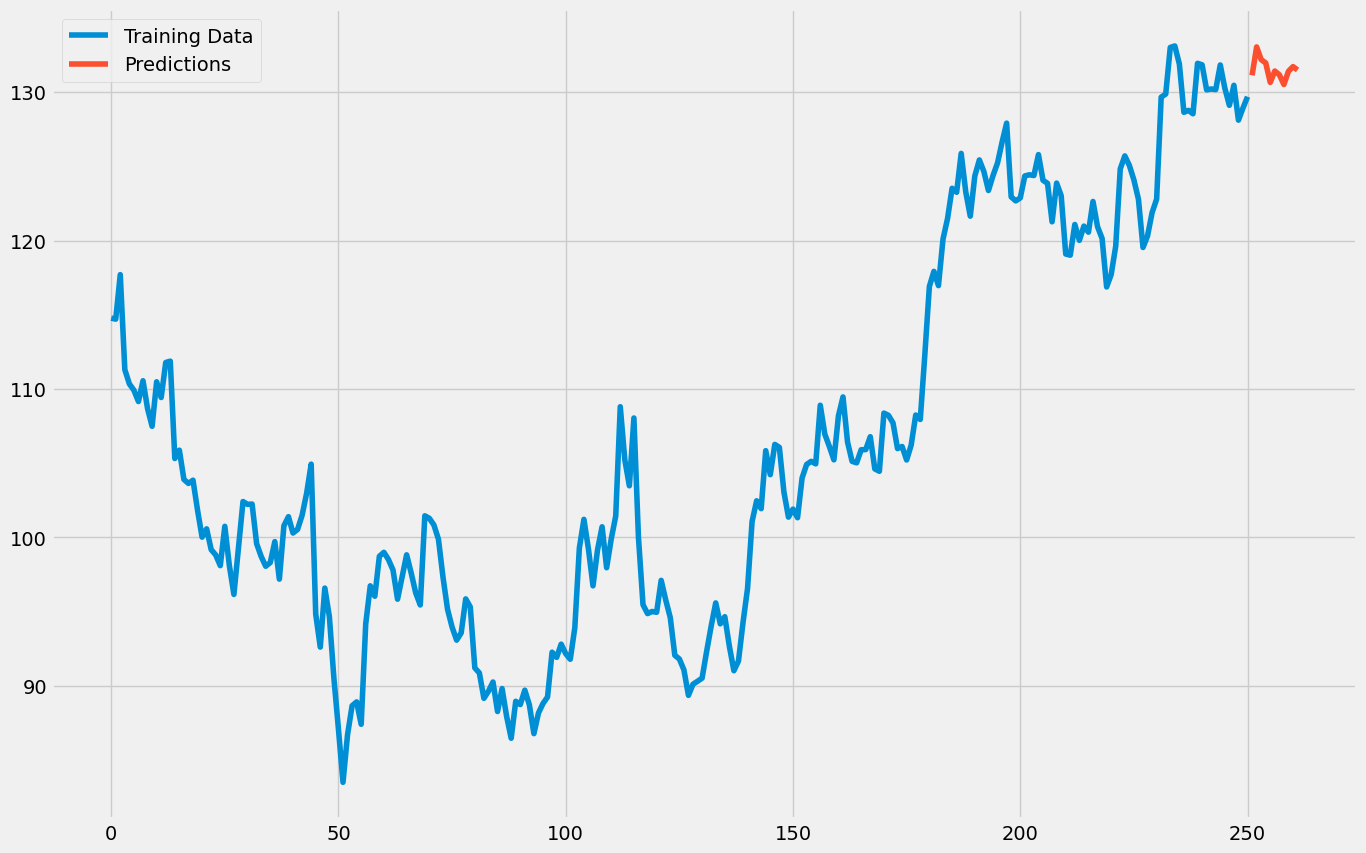

In [24]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

So this is how you can use ARIMA or SARIMA models for Time Series Forecasting using Python.

## Summary
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA). I hope you liked this article about Time Series Forecasting with ARIMA using Python. Feel free to ask valuable questions in the comments section below.

In [22]:
mae = mean_absolute_error(test_data['Close'], forecast)
mse = mean_squared_error(test_data['Close'], forecast)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


NameError: name 'test_data' is not defined

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
pip install sckitlearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckitlearn (from versions: none)
ERROR: No matching distribution found for sckitlearn

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 1.8 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import sklearn

# Now you can use the various modules and classes within sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Your code here...


In [27]:
mae = mean_absolute_error(Training_Data['Close'], forecast)
mse = mean_squared_error(Training_Data['Close'], forecast)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


NameError: name 'Training_Data' is not defined